# Workshop 02 - Cluster Analysis

#### Table of Contents
- [Introduction](#intro)
    - [What is Cluster Analysis?](#what-is)
    - [Clustering Applications](#applications)
    - [Properties of a Good Clustering Method](#good)
- [Setup](#setup)
    - [Import Required Modules](#import)
    - [Configure Plot Styling](#styling)
    - [Create Training Data](#data)
    - [Define Helper Functions](#functions)
- [Clustering Algorithms](#clustering-algorithms)
    - [K-means](#k-means)
    - [DBSCAN](#dbscan)
    - [Gaussian Mixture Model](#gaussian-mixture-model)
    - [BIRCH](#birch)
    - [Affinity Propagation](#affinity-propagation)
    - [Mean-Shift](#mean-shift)
    - [OPTICS](#optics)
    - [Agglomerative Hierarchy](#agglomerative-hierarchy)
- [Review](#review)
    - [Covered Clustering Algorithms](#covered)
    - [All scikit-learn Clustering Algorithms](#all)

<a id='intro'></a>
## Introduction

<a id='what-is'></a>
#### What is Cluster Analysis?

> **Cluster analysis** or **clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a **cluster**) are more similar (in some sense) to each other than to those in other groups (clusters).
> 
> ...
>
> Cluster analysis itself is not one specific algorithm, but the general task to be solved. It can be achieved by various algorithms that differ significantly in their understanding of what constitutes a cluster and how to efficiently find them.
> 
> [Source (Wikipedia)](https://en.wikipedia.org/wiki/Cluster_analysis)

Clustering is an unsupervised machine learning technique, as it does not require labeled data. As such, clustering groups datasets by inherent similarities between samples, rather than classifying each sample by its individual features.

<a id='applications'></a>
#### Clustering Applications
- Recommendation systems:  by learning the users' purchase history, a clustering model can segment users by similarities, helping you find like-minded users or related products.
- Biology: [sequence clustering](https://en.wikipedia.org/wiki/Sequence_clustering) algorithms attempt to group biological sequences that are somehow related. Proteins were clustered according to their amino acid content.
- Images/videos: divide images or videos into groups based on their similarities
- Medicine: in a medical database, each patient may have a distinct real-valued measure for specific tests (e.g., glucose, cholesterol). Clustering patients first may help us understand how binning should be done on real-valued features to reduce feature sparsity and improve accuracy on classification tasks such as survival prediction of cancer patients.
- General: generating a compact summary of data for classification, pattern discovery, hypothesis generation and testing.

<a id='good'></a>
#### Properties of a Good Clustering Method
A good clustering method will produce high-quality clusters with the following properties:
- High intra-class similarity (i.e., cohesiveness *within* clusters)
- Low inter-class similarity (i.e., distinctiveness *between* clusters)

<a id='setup'></a>
## Setup
<a id='import'></a>
##### Import Required Modules

In [51]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
import itertools

<a id='styling'></a>
##### Configure Plot and Table Styling

In [52]:
from IPython.core.pylabtools import figsize
from IPython.core.display import HTML

# Set figure size for display
figsize(12, 8)

# Center plots horizontally and vertically
# Reference: https://moonbooks.org/Articles/How-to-center-a-matplotlib-figure-in-a-Jupyter-notebook-/
HTML('''
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: center;
}
</style
''')

In [53]:
%%html
<style>td, th {text-align: left !important}</style>

<a id='data'></a>
##### Create Training Data

In [54]:
# Make 6 randomized datasets with 1000 samples each
datasets = []
for i in range(1, 7):
    data, _ = make_classification(
        n_samples=1000,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_clusters_per_class=1,
        random_state=i
    )
    datasets.append(data)

<a id='functions'></a>
##### Define Helper Functions

In [55]:
def fit_model(model, dataset, ax):
    '''Fits the model to the dataset, makes predictions, and plots the clustered data.
    Arguments:
        model -- the model to fit to the data
        dataset -- the dataset used to train the model and predict clusters for
        ax -- the matplotlib Axes object to plot the clustered data with
    '''
    result = model.fit_predict(dataset)

    clusters = unique(result)
    for cluster in clusters:
        index = where(result == cluster)
        ax.scatter(dataset[index, 0], dataset[index, 1])
    
def demo_model(model):
    '''Fits the model to all 6 randomized datasets and plots the results in a 2x3 grid of subplots.
    Arguments:
        model -- the model to fit to the data
    '''
    fig, axes = pyplot.subplots(2, 3)
    
    for dataset, ax in zip(datasets, list(itertools.chain.from_iterable(axes))):
        fit_model(model, dataset, ax)
        
    pyplot.show()

<a id='clustering-algorithms'></a>
## Clustering Algorithms

For the remainder of this workshop, we will explore 8 different clustering algorithms: K-Means, DBSCAN, Gaussian Mixture Model, BIRCH, Affinity Propagation, Mean-Shift, OPTICS, and Agglomerative Hierarchy.

<a id='k-means'></a>
### K-means

The **K-means** algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the *inertia* or within-cluster sum-of-squares. It requires the number of clusters to be specified, but it scales well to large numbers of samples and has been used across a large range of application areas in many different fields.

The **K-means** algorithm aims to choose cluster centroids that minimise the **inertia**, or **within-cluster sum-of-squares** criterion:
$$\sum_{i=0}^n\underset{\mu_j\in C}{\text{min}}(||x_i-\mu_j||^2)$$

##### Drawbacks:
- Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.
- Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated.

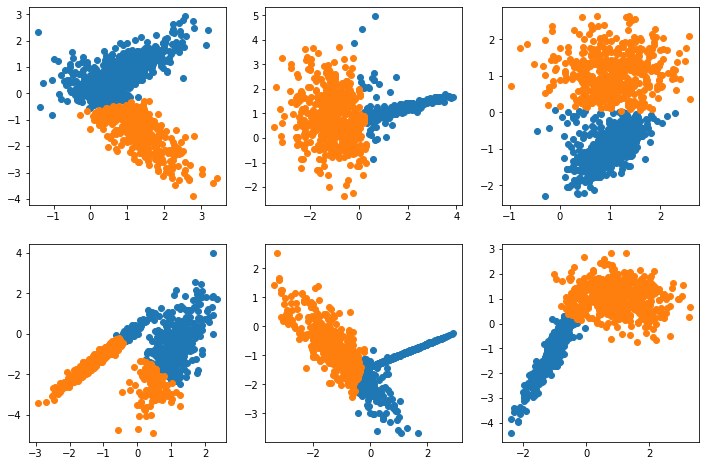

In [56]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2)
demo_model(kmeans_model)

<a id='dbscan'></a>
### DBSCAN
##### Density-Based Spatial Clustering of Applications with Noise

The **DBSCAN** algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of *core samples*, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples).

There are two parameters to the algorithm, `min_samples` and `eps`, which define formally what we mean when we say *dense*. More formally, we define a core sample as being a sample in the dataset such that there exist `min_samples` other samples within a distance of `eps`, which are defined as neighbors of the core sample. Higher `min_samples` or lower `eps` indicate higher density necessary to form a cluster. While the parameter `min_samples` primarily controls how tolerant the algorithm is towards noise (on noisy and large data sets it may be desirable to increase this parameter), the parameter `eps` is *crucial to choose appropriately* for the data set and distance function, and usually cannot be left at the default value.

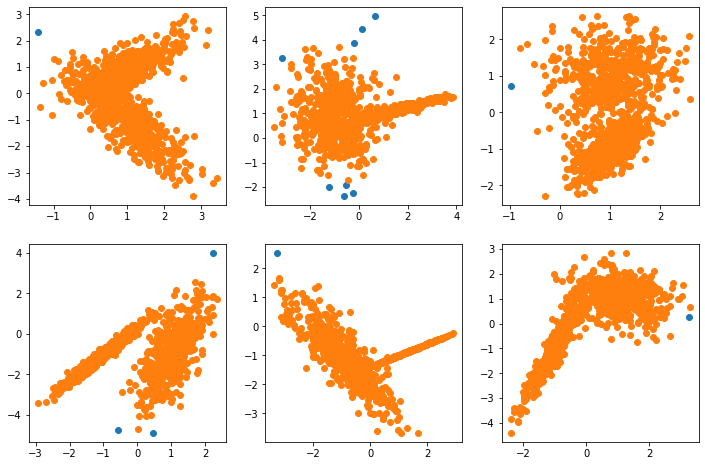

In [68]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=0.25, min_samples=9)
demo_model(dbscan_model)

<a id='gaussian-mixture-model'></a>
### Gaussian Mixture Model

A **Gaussian mixture model** is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of [Gaussian distributions](https://en.wikipedia.org/wiki/Normal_distribution) with unknown parameters. One can think of mixture models as generalizing K-means clustering to incorporate information about the covariance structure of the data as well as the centers (i.e., means) of the latent Gaussians.

##### Pros:
- It is the fastest algorithm for learning mixture models
- As this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply.

##### Cons:
- When one has insufficiently many points per mixture, estimating the covariance matrices becomes difficult, and the algorithm is known to diverge and find solutions with infinite likelihood unless one regularizes the covariances artificially.
- This algorithm will always use all the components it has access to, needing held-out data or theoretical criteria to decide how many components to use in the absence of external cues.

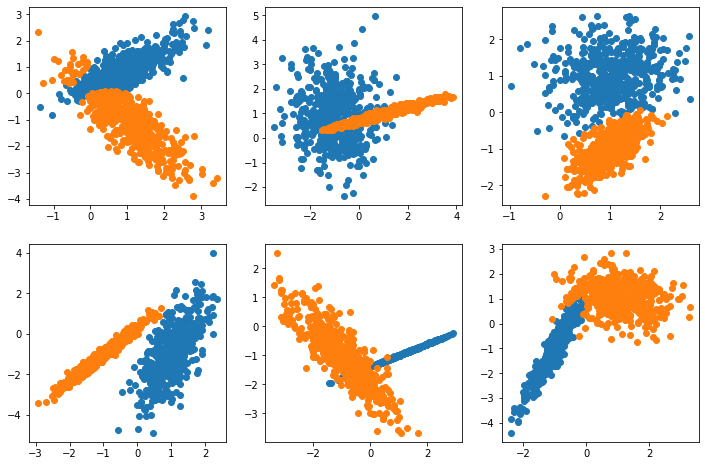

In [58]:
from sklearn.mixture import GaussianMixture

gaussian_model = GaussianMixture(n_components=2)
demo_model(gaussian_model)

<a id='birch'></a>
### BIRCH
##### Balance Iterative Reducing and Clustering using Hierarchies

The **BIRCH** algorithm builds a tree called the Clustering Feature Tree (CFT) for the given data. The data is essentially lossy compressed to a set of Clustering Feature nodes (CF Nodes). The CF Nodes have a number of subclusters called Clustering Feature subclusters (CF Subclusters), and CF Subclusters located in the non-terminal CF Nodes can have CF Nodes as children.

The CF Subclusters hold the necessary information for clustering which prevents the need to hold the entire input data in memory. This information includes:
- Number of samples in a subcluster.
- Linear Sum - An n-dimensional vector holding the sum of all samples
- Squared Sum - Sum of the squared L2 norm of all samples.
- Centroids - To avoid recalculation linear sum / n_samples.
- Squared norm of the centroids.

The BIRCH algorithm has two parameters, the `threshold` and the `branching_factor`. The `branching_factor` limits the number of subclusters in a node and the `threshold` limits the distance between the entering sample and the existing subclusters.

##### Drawbacks
- It does not scale very well to high dimensional data

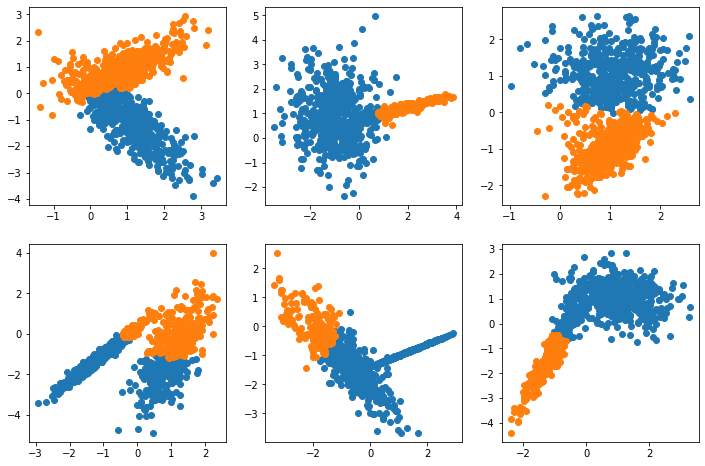

In [59]:
from sklearn.cluster import Birch

birch_model = Birch(threshold=0.03, n_clusters=2)
demo_model(birch_model)

<a id='affinity-propagation'></a>
### Affinity Propagation

The **Affinity Propagation** algorithm creates clusters by sending messages between pairs of samples until convergence. A dataset is then described using a small number of exemplars, which are identified as those most representative of other samples. The messages sent between pairs represent the suitability for one sample to be the exemplar of the other, which is updated in response to the values from other pairs. This updating happens iteratively until convergence, at which point the final exemplars are chosen, and hence the final clustering is given. The `damping` parameter, which should be set to a value in the range $[0.5,1.0)$, is the extent to which the current value is maintained relative to incoming values (weighted `1 - damping`).

The main drawback of Affinity Propagation is its complexity. The algorithm has a time complexity of $O(N^2T)$, where $N$ is the number of samples and $T$ is the number of iterations until convergence.

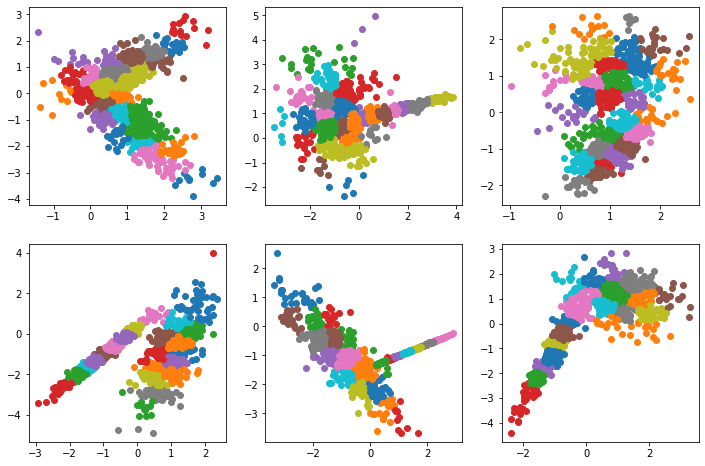

In [69]:
from sklearn.cluster import AffinityPropagation

ap_model = AffinityPropagation(damping=0.9)
demo_model(ap_model)

<a id='mean-shift'></a>
### Mean-Shift

The **Mean-Shift** algorithm aims to discover *blobs* in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

The algorithm is not highly scalable, as it requires multiple nearest neighbor searches during the execution of the algorithm. It is guaranteed to converge, however the algorithm will stop iterating when the change in centroids is small.

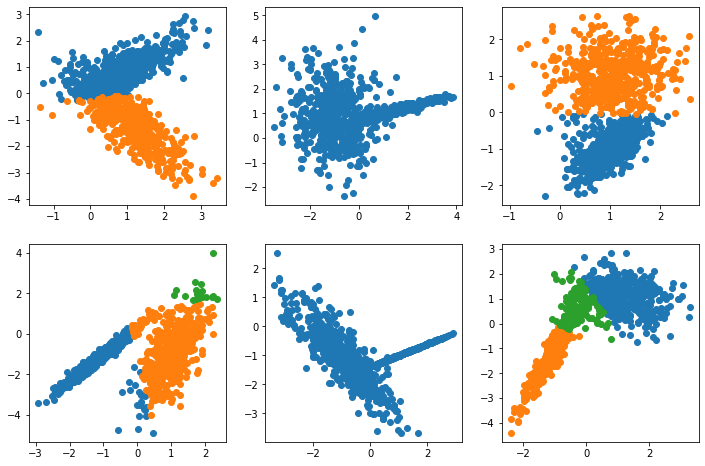

In [61]:
from sklearn.cluster import MeanShift

ms_model = MeanShift()
demo_model(ms_model)

<a id='optics'></a>
### OPTICS
##### Ordering Points to Identify the Clustering Structure

The **OPTICS** algorithm shares many similarities with the DBSCAN algorithm, and can be considered a generalization of DBSCAN that relaxes the `eps` requirement from a single value to a value range. The key difference between DBSCAN and OPTICS is that the OPTICS algorithm builds a *reachability* graph, which assigns each sample both a `reachability_` distance, and a spot within the cluster `ordering_` attribute; these two attributes are assigned when the model is fitted, and are used to determine cluster membership. The *reachability* distances generated by OPTICS allow for variable density extraction of clusters within a single data set.

Here, we use the `eps` (the maximum distance between two samples for one to be considered in the neighborhood of the other) and `min_samples` (the number of samples in a neighborhood for a point to be considered as a core point) parameters.

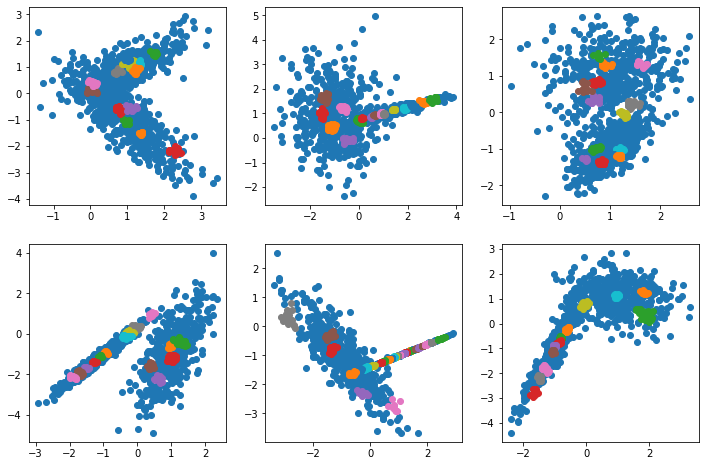

In [62]:
from sklearn.cluster import OPTICS

optics_model = OPTICS(eps=0.75, min_samples=10)
demo_model(optics_model)

<a id='agglomerative-hierarchy'></a>
### Agglomerative Hierarchy

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample.

The **Agglomerative Clustering** algorithm performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. It can scale to large numbers of samples when it is used jointly with a connectivity matrix, but is computationally expensive when no connectivity constraints are added between samples: it considers at each step all the possible merges.

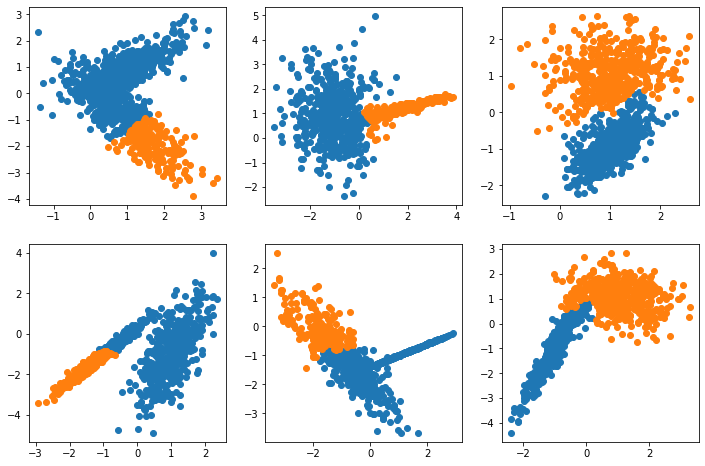

In [63]:
from sklearn.cluster import AgglomerativeClustering

ac_model = AgglomerativeClustering(n_clusters=2)
demo_model(ac_model)

<a id='review'></a>
## Review
<a id='covered'></a>
#### Covered Clustering Algorithms
<table>
    <tr><th>Clustering Method</th><th>Parameters</th><th>Usecase</th><th>Geometry (metric used)</th></tr>
    <tr><td><a href='https://scikit-learn.org/stable/modules/clustering.html#k-means'>K-Means</a></td><td>number of clusters</td><td>General-purpose, even cluster size, flat geometry,
not too many clusters, inductive</td><td>Distances between points</td></tr>
    <tr><td><a href='https://scikit-learn.org/stable/modules/clustering.html#dbscan'>DBSCAN</a></td><td>neighborhood size</td><td>Non-flat geometry, uneven cluster sizes, outlier removal,
transductive</td><td>Distances between nearest points</td></tr>
    <tr><td><a href='https://scikit-learn.org/stable/modules/mixture.html#mixture'>Gaussian mixtures</a></td><td>many</td><td>Flat geometry, good for density estimation, inductive</td><td>Mahalanobis distances to centers</td></tr>
    <tr><td><a href='https://scikit-learn.org/stable/modules/clustering.html#birch'>BIRCH</a></td><td>branching factor, threshold, optional global clusterer</td><td>Large dataset, outlier removal, data reduction, inductive</td><td>Euclidean distance between points</td></tr>
    <tr><td><a href='https://scikit-learn.org/stable/modules/clustering.html#affinity-propagation'>Affinity propagation</a></td><td>damping, sample preference</td><td>Many clusters, uneven cluster size, non-flat geometry, inductive</td><td>Graph distance (e.g. nearest-neighbor graph)</td></tr>
    <tr><td><a href='https://scikit-learn.org/stable/modules/clustering.html#mean-shift'>Mean-shift</a></td><td>bandwidth</td><td>Many clusters, uneven cluster size, non-flat geometry, inductive</td><td>Distances between points</td></tr>
    <tr><td><a href='https://scikit-learn.org/stable/modules/clustering.html#optics'>OPTICS</a></td><td>minimum cluster membership</td><td>Non-flat geometry, uneven cluster sizes, variable cluster density, outlier removal, transductive</td><td>Distances between points</td></tr>
    <tr><td><a href='https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering'>Agglomerative clustering</a></td><td>number of clusters or distance threshold, linkage type, distance</td><td>Many clusters, possibly connectivity constraints, non Euclidean distances, transductive</td><td>Any pairwise distance</td></tr>
</table>

<a id='all'></a>
#### All scikit-learn Clustering Algorithms
<div style="width: 100%;"><img src="img/sklearn_cluster.png"/></div>
<div style="width: 100%; text-align: center;">A comparison of all the clustering algorithms implemented in the <a href='https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster'>sklearn.cluster</a> module</div>